# Introduction to Python - Lecture 13 (May 14th 2020)

## -------------- Pandas and Seaborn to analyze data ---------------

This class will focus on:
  - Advanced Pandas
  - Plotting with Seaborn
    
## --------------------------------------------------------------------------

Links for this class
<br>

 - Stack Overflow: https://stackoverflow.com/c/nyumc-coding-courses/questions

 - Online Courses Page: http://fenyolab.org/presentations/Bioinformatics_2020/


### The packages needed for todays lecture:

+ jupyter
+ matplotlib
+ numpy
+ pandas
+ seaborn


### Links for this lecture

- Pandas
https://pandas.pydata.org/docs/user_guide/index.html

- Matplotlib
https://matplotlib.org/

- Seaborn
https://seaborn.pydata.org/

- examples for data science based on Numpy and Panda

https://towardsdatascience.com/

https://realpython.com/

### Cheat sheets

+ Pandas
<br>                      
https://ugoproto.github.io/ugo_py_doc/pdf/pandas-cheat-sheet.pdf
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf


+ matplotlib
<br>   
https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf


+ seaborn
<br>   
https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf

### The Journey so Far

In the previous lectures we learned how to load data into a dataframe and then extract specific subsets of data from the dataframe. We also created some plots using matplotlib.

Today we will look at more advanced functionality:
  + Creating new rows/columns
    + Using new data
    + Using data in existing columns
  + Grouping data
  + Aggregating data
  + Applying functions accross rows/columns
  + Restructuring the table
    + Converting a wide format table into a long format
    + Converting a long format table into a wide format
  + Different types of plots in Seaborn
  + Adjusting Color Pallets
  + Adjusting figure size
    + Using `plt.figure()` for each plot
    + Using seaborn rc
  + Changing plot aesthetics
    
Lets start by importing pandas, numpy and matplotlib

```python
import pandas as pd
import numpy as np
import matplotlib as plt
```

In [2]:
#write your code here: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Adding New Data


```python
df = pd.DataFrame({'a': [0,0,0,0], 'b': [1, 1, 1 ,1]})
df
```

##### Adding rows:
+ Using append\(\)
    + The rows must be represented as a dictionary
      + key = column
      + value is the value
    + The ignore index flag must be set
    + This operation does not alter the original dataframe

```python
df = pd.DataFrame({'a': [0,0,0,0], 'b': [1, 1, 1 ,1]})
df = df.append({'a': 1, 'b':2}, ignore_index=True)
df
```

+ Using loc
    + We can add a new row using `df.loc["row_name"]` or `df.loc[index]`
    
```python
# this will add a row containing zeros
df.loc[len(df)] = 0
# this will add a row with a=5 and b=6
df.loc[len(df)] = [5, 6]
# The number of elements in the array need to match the number of columns
# df.loc[len(df)] = [1, 2, 3]
```
  

In [3]:
#write your code here: 

df = pd.DataFrame({'a': [0,0,0,0], 'b': [1, 1, 1 ,1]})
df = df.append({'a': 1, 'b':2}, ignore_index=True)

df.loc[len(df)] = np.nan
df.loc[len(df)] = [5, 6]

df.loc[10] = 9

df.reset_index(drop=True)

,a,b
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,2.0
5,NaN,NaN
6,5.0,6.0
7,9.0,9.0


##### Adding columns:
+ Using indexing[]
    + Updates the existing DataFrame
    + Either it must be assigned to a list with the same number of elements as there are rows
    + Or a constant can be assigned

```python
df = pd.DataFrame({'a': [0,0,0,0], 'b': [1, 1, 1 ,1]})
df["c"] = [1,2,3,4]
df["d"] = 5
df
```

In [4]:
#write your code here: 

df = pd.DataFrame({'a': [0,0,0,0], 'b': [1, 1, 1 ,1]})
df["c"] = [1,2,3,4]
df["d"] = 5
df

,a,b,c,d
0,0,1,1,5
1,0,1,2,5
2,0,1,3,5
3,0,1,4,5


+ Using assign()
    + Creates a new DataFrame
    + A column can be assigned:
      + A constant
      + A value for each row
      + A function that calculates the rows value using another row
    
```python
df = pd.DataFrame({'a': [0,0,0,0], 'b': [1, 1, 1 ,1]})
df = df.assign(c=5)
df = df.assign(d=[1,2,3,4])
df = df.assign(e=lambda x: x['d']**2)
df
```

In [5]:
#write your code here: 

def square(x):
    return x['d']**2

df = pd.DataFrame({'a': [0,0,0,0], 'b': [1, 1, 1 ,1]})
df = df.assign(c=5)
df = df.assign(d=[1,2,3,4], g=(6,7,8,9))
df = df.assign(e=square)
df

,a,b,c,d,g,e
0,0,1,5,1,6,1
1,0,1,5,2,7,4
2,0,1,5,3,8,9
3,0,1,5,4,9,16


+ Using insert()
    + Is an in place operation
    + Requires three positional arguments:
      + loc: the index of where to insert the column (0 <= index <= len(df.columns))
      + column: the column name
      + value: the values to insert. A constant or a list with len(df)

```python    
df = pd.DataFrame({'a': [0,0,0,0], 'b': [1, 1, 1 ,1]})
df.insert(loc=len(df.columns), column='c', value=5)
df.insert(loc=len(df.columns), column='d', value=[1, 2, 3, 4])
df
```

In [6]:
#write your code here: 

df = pd.DataFrame({'a': [0,0,0,0], 'b': [1, 1, 1 ,1]})
df.insert(loc=len(df.columns), column='c', value=5)
df.insert(loc=len(df.columns), column='d', value=[1, 2, 3, 4])

df.insert(loc=2, column='e', value=[1, 2, 3, 4])

df

df[df.columns[::-1]]

,d,c,e,b,a
0,1,5,1,1,0
1,2,5,2,1,0
2,3,5,3,1,0
3,4,5,4,1,0


#### Adding rows / columns using existing data

We saw an example of this when adding a column using append.

There are many methods of achieving the same result.

##### The `agg()` function

The `agg()` function will aggregate either rows or columns of the DataFrame.

The agg function returns a new DataFrame, so the results need to be saved either into a new dataframe, or into an existing dataframe.

+ Adding new columns
  + columns are added by using `axis=1`
  + You can use a single function to add a single column
  + You can also use a list of functions to add multiple columns
  + There are built in functions that can be called by passing a string
    + mean(): Compute mean of groups
    + sum(): Compute sum of group values
    + size(): Compute group sizes
    + count(): Compute count of group
    + std(): Standard deviation of groups
    + var(): Compute variance of groups
    + sem(): Standard error of the mean of groups
    + describe(): Generates descriptive statistics
    + first(): Compute first of group values
    + last(): Compute last of group values
    + nth() : Take nth value, or a subset if n is a list
    + min(): Compute min of group values
    + max(): Compute max of group values
  
```python
import numpy as np

df = pd.DataFrame({'a': [1,1,1,1], 'b': [1, 2, 3 ,4]})
df["sum"] = df.agg(sum, axis=0)
df[['std', 'sum', 'mean', 'max', 'min']] = df.agg([np.std, 'sum', 'mean', 'max', 'min'], axis=1)
df
```

In [8]:
#write your code here: 

df = pd.DataFrame({'a': [1,1,1,1], 'b': [1, 2, 3 ,4]})

df.agg([np.std, np.sum, 'mean', 'max', 'min'], axis='columns')

df[
    [
        'std', 
        'sum', 
        'mean', 
        'max', 
        'min'
    ]
] = df.agg([np.std, np.sum, 'mean', 'max', 'min'], axis=1)


df = pd.concat([df,df.agg([np.std, np.sum, 'mean', 'max', 'min'], axis='rows')])

df

,a,b,std,sum,mean,max,min
0,1.0,1.000000,0.000000,2.000000,1.000000,1.000000,1.0
1,1.0,2.000000,0.707107,3.000000,1.500000,2.000000,1.0
2,1.0,3.000000,1.414214,4.000000,2.000000,3.000000,1.0
3,1.0,4.000000,2.121320,5.000000,2.500000,4.000000,1.0
std,0.0,1.290994,0.912871,1.290994,0.645497,1.290994,0.0
sum,4.0,10.000000,4.242641,14.000000,7.000000,10.000000,4.0
mean,1.0,2.500000,1.060660,3.500000,1.750000,2.500000,1.0
max,1.0,4.000000,2.121320,5.000000,2.500000,4.000000,1.0
min,1.0,1.000000,0.000000,2.000000,1.000000,1.000000,1.0


+ Adding new rows
  + rows are added by using the `axis=0` argument. If no axis is defined, this is the default
  + Asside from the axis everything works exactly the same
  + Use `.append()` or `.loc` to add a single row
  + Use `.append()` for adding multiple rows
  
```python
df = pd.DataFrame({'a': [1,1,1,1], 'b': [1, 2, 3 ,4]})
df.loc['total'] = df.agg(sum, axis=0)
df = df.append(df.agg(['min', 'max', 'mean']))
df
```

In [11]:
#write your code here: 

df = pd.DataFrame({'a': [1,1,1,1], 'b': [1, 2, 3 ,4]})

#df.loc['total'] = df.agg(sum, axis=0)
#df = df.append(df.agg(['min', 'max', 'mean']))

df = df.append(df.agg(['sum','min', 'max', 'mean']))

df

,a,b
0,1.0,1.0
1,1.0,2.0
2,1.0,3.0
3,1.0,4.0
sum,4.0,10.0
min,1.0,1.0
max,1.0,4.0
mean,1.0,2.5


##### Using `apply()`

Apply and agg are similar, apply can be applied to single values, while agg always acts on a whole row or column


```python
df = pd.DataFrame({'a': [1,1,1,1], 'b': [1, 2, 3 ,4]})
df.apply(np.sqrt)
```

In [12]:
#write your code here: 

df = pd.DataFrame({'a': [np.nan,1,1,1], 'b': [1, 2, 3 ,4]})
df.apply(np.sqrt)

#df.isna().sum(axis=0)
#df.isna().sum(axis=1)

,a,b
0,NaN,1.000000
1,1.0,1.414214
2,1.0,1.732051
3,1.0,2.000000


##### Normalizing a column

There are many methods that can be applied to normalize a column.

This example uses min-max normalization which will normalize the values to lie between 0 and 1

```python
df = pd.DataFrame({'a': [1,1,1,1], 'b': [1, 2, 3 ,4]})
df['b'] = (df['b'] - df['b'].min()) / (df['b'].max() - df['b'].min())
df
```

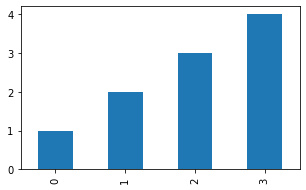

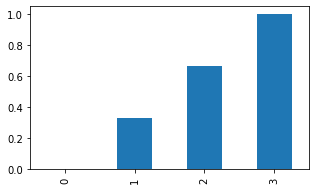

,a,b
0,1,0.000000
1,1,0.333333
2,1,0.666667
3,1,1.000000


In [15]:
#write your code here: 

df = pd.DataFrame({'a': [1,1,1,1], 'b': [1, 2, 3 ,4]})

#define default plotting parameters for all matplotlib.pyplot objects
plt.rcParams['figure.figsize'] = (5, 3)

_ = df['b'].plot(kind='bar')
plt.show()


df['b'] = (df['b'] - df['b'].min()) / (df['b'].max() - df['b'].min())

_ = df['b'].plot(kind='bar')
plt.show()
df

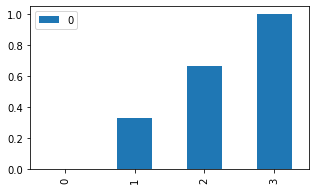

In [16]:
#we can get the same result with the module sklearn (more refined scaler are available)
#Install conda install -c anaconda scikit-learn
from sklearn import preprocessing

# Create a minimum and maximum processor object
x = df[['b']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

_ = pd.DataFrame(x_scaled).plot(kind='bar')

#### Modifying Rows / Columns

Rows and columns can be modified by overwriting their values using [] indexing or .loc indexing

```python
df = pd.DataFrame({'a': [1,1,1,1], 'b': [1, 2, 3 ,4]})
df['a'] = df['a'] + 5
df.loc[df['b'] % 2 == 0] = df.loc[df['b'] % 2 == 0] + 1
df
```

In [22]:
#write your code here: 

df = pd.DataFrame({'a': [1,1,1,1], 'b': [1, 2, 3 ,4]})
df['a'] = df['a'] + 5

np.arange(10) % 2
df['b'] % 2 == 0

df.loc[df['b'] % 2 == 0] = df.loc[df['b'] % 2 == 0] + 1

df



,a,b
0,6,1
1,7,3
2,6,3
3,7,5


### Grouping Data

Seaborn comes with some built in dataframes.
The flights dataset is a nice example for grouping as it is easy to understand and manipulate.
This dataset gives the number of passengers who flew between 1949 and 1960. When loading the dataset no information is given regarding the order of the number of passengers, but this is not important for our purposes.

```python
import seaborn as sns
df = sns.load_dataset('flights')
df.tail()
```


In [27]:
#write your code here: 

import seaborn as sns
df = sns.load_dataset('flights')
df.tail()



,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


#### Using groupby
###### Finding out how many passengers flew each year

On its own, the groupby function does not actually do anything. It needs to be used in conjunction with some form of agregation.

```python
df.groupby('year')
# > <pandas.core.groupby.generic.DataFrameGroupBy object at 0x1164e32e8>
```

To answer the above question we would like to know the total. To calculate this we can use the `.sum()` function.

The dataframe will first be grouped into years, and then each group will be summed.
```python
df.groupby('year').sum()
```

In [29]:
#write your code here: 

df.groupby('year').sum()

,passengers
year,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700
1954,2867
1955,3408
1956,3939
1957,4421


To get a better idea of what is happening we can use the `agg` function.
This function will apply a function that reduces the data to a single value.

To help visualize the date we can use the `list` function, which will reduce all the values into a single list

```python
df.groupby('year').agg(list)
```

In [30]:
#write your code here: 

df.groupby('year').agg(list)

,month,passengers
year,,
1949,"[January, February, March, April, May, June, J...","[112, 118, 132, 129, 121, 135, 148, 148, 136, ..."
1950,"[January, February, March, April, May, June, J...","[115, 126, 141, 135, 125, 149, 170, 170, 158, ..."
1951,"[January, February, March, April, May, June, J...","[145, 150, 178, 163, 172, 178, 199, 199, 184, ..."
1952,"[January, February, March, April, May, June, J...","[171, 180, 193, 181, 183, 218, 230, 242, 209, ..."
1953,"[January, February, March, April, May, June, J...","[196, 196, 236, 235, 229, 243, 264, 272, 237, ..."
1954,"[January, February, March, April, May, June, J...","[204, 188, 235, 227, 234, 264, 302, 293, 259, ..."
1955,"[January, February, March, April, May, June, J...","[242, 233, 267, 269, 270, 315, 364, 347, 312, ..."
1956,"[January, February, March, April, May, June, J...","[284, 277, 317, 313, 318, 374, 413, 405, 355, ..."
1957,"[January, February, March, April, May, June, J...","[315, 301, 356, 348, 355, 422, 465, 467, 404, ..."


This functionality is the same as using `.agg()` on a dataframe. You can use any of the predefined functions that we discussed earlier, multiple agrigation calculations can be applied at the same time.

```python
df.groupby('year').agg(['sum', 'mean'])
```

In [31]:
#write your code here: 

df.groupby('year').agg(['sum', 'mean', 'max'])

passengers                 
            sum        mean  max
year                            
1949       1520  126.666667  148
1950       1676  139.666667  170
1951       2042  170.166667  199
1952       2364  197.000000  242
1953       2700  225.000000  272
1954       2867  238.916667  302
1955       3408  284.000000  364
1956       3939  328.250000  413
1957       4421  368.416667  467
1958       4572  381.000000  505
1959       5140  428.333333  559
1960       5714  476.166667  622

###### Finding the average number of passengers per month

We can make use of the groupby and mean functions to achieve this.

Lets start simple
```python
df.groupby('month').mean()
```

What is wrong with this output?

In [32]:
#write your code here: 

df.groupby('month').mean()

,year,passengers
month,,
January,1954.5,241.750000
February,1954.5,235.000000
March,1954.5,270.166667
April,1954.5,267.083333
May,1954.5,271.833333
June,1954.5,311.666667
July,1954.5,351.333333
August,1954.5,351.083333
September,1954.5,302.416667


To fix this we need to first subset our data and remove columns we would not like to agregate.
```python
df[["month", "passengers"]].groupby('month').mean()
```

In [33]:
#write your code here: 

df[["month", "passengers"]].groupby('month').mean()

,passengers
month,
January,241.750000
February,235.000000
March,270.166667
April,267.083333
May,271.833333
June,311.666667
July,351.333333
August,351.083333
September,302.416667


#### What if we wanted to see the median number of passengers by month in 5 year increments?

This is more complicated, we would first need to add a new column defining which 5 year period that year falls into, then we can apply a groupby followed by a median function.

```python
min_year = df['year'].min()
df['5_year_period'] = df.apply(lambda x: (x['year'] - min_year) // 5, axis=1)
# This could also be achieved without the apply()
# df['5_year_period'] = (df['year'] - df['year'].min()) // 5
df
```

Lets break that down
+ `df['year'].min()`
  + This returns the earliest year
  + If we subtract this from each year it will normalize the years to start from 0
+ `df.apply()` will apply a function to the dataframe
  + This happens either: 
    + down columns (axis=0)
    + across rows (axis=1) 
  + The result of apply returns a new dataframe and does not change the original
+ `lambda x:`
  + `lambda` functions are nameless functions
  + `x` is the variable that is passed to the function
  + This is neater than defining a function as it can be defined inline
    + If the function is complicated it is better to define a function
+ `(x['year'] - min_year) // 5`
  + `x[year]` is the year in the current row being evaluated
  + `//5` is integer/floor division, the remainder is removed and an integer is returned
  + This results in 0 for the first 5 years, 1 for the next 5 years and so on

In [37]:
#write your code here: 

min_year = df['year'].min()
print('min:', min_year)

# (np.arange(1945,1970,1)-1945) // 5
# df.apply(lambda x: (x['year'] - min_year) // 5, axis=1)


df['5_year_period'] = df.apply(lambda x: (x['year'] - min_year) // 5, axis=1)

# df
# This could also be achieved without the apply()
# df['5_year_period'] = (df['year'] - df['year'].min()) // 5
df.head(100)

min: 1949


,year,month,passengers,5_year_period
0,1949,January,112,0
1,1949,February,118,0
2,1949,March,132,0
3,1949,April,129,0
4,1949,May,121,0
...,...,...,...,...
95,1956,December,306,1
96,1957,January,315,1
97,1957,February,301,1
98,1957,March,356,1


Now we can drop the year column and groupby the month and the period. Then we can take the median.

```python
df.drop(columns=['year']).groupby(['month', '5_year_period']).median()
```

In [38]:
#write your code here: 

df.drop(columns=['year']).groupby(['month', '5_year_period']).median()

passengers
month     5_year_period            
January   0                   145.0
          1                   284.0
          2                   388.5
February  0                   150.0
          1                   277.0
          2                   366.5
March     0                   178.0
          1                   317.0
          2                   412.5
April     0                   163.0
          1                   313.0
          2                   428.5
May       0                   172.0
          1                   318.0
          2                   446.0
June      0                   178.0
          1                   374.0
          2                   503.5
July      0                   199.0
          1                   413.0
          2                   585.0
August    0                   199.0
          1                   405.0
          2                   582.5
September 0                   184.0
          1                   355.0
          2                   485.5
October   0                   162.0
          1                   306.0
          2                   434.0
November  0                   146.0
          1                   271.0
          2                   376.0
December  0                   166.0
          1                   306.0
          2                   418.5

##### An alternate approach

0, 1, 2 are not very informative columns, instead we should keep this in years.

```python
df['5_year_period'] = df.apply(lambda x: '{}-{}'.format((x['year'] // 5) * 5, ((x['year'] + 5) // 5) * 5), axis=1)
df
```

In [39]:
#write your code here: 

df['5_year_period'] = df.apply(lambda x: '{}-{}'.format((x['year'] // 5) * 5, ((x['year'] + 5) // 5) * 5), axis=1)
df

,year,month,passengers,5_year_period
0,1949,January,112,1945-1950
1,1949,February,118,1945-1950
2,1949,March,132,1945-1950
3,1949,April,129,1945-1950
4,1949,May,121,1945-1950
...,...,...,...,...
139,1960,August,606,1960-1965
140,1960,September,508,1960-1965
141,1960,October,461,1960-1965
142,1960,November,390,1960-1965


In [40]:
#write your code here: 

df_median = df.drop(columns='year').groupby(['month', '5_year_period']).median()
df_median.head(10)

passengers
month    5_year_period            
January  1945-1950             112
         1950-1955             171
         1955-1960             315
         1960-1965             417
February 1945-1950             118
         1950-1955             180
         1955-1960             301
         1960-1965             391
March    1945-1950             132
         1950-1955             193

We now have a long format table. The reason that this table is in long format is that we have a single passenger count per row in the dataframe. Alternatively, in wide format, each month would have three values. One for each of the 5 year windows.

Converting from long format to wide format requires the `pivot()` function.

Before we can pivot the table, we need to reset the index using `reset_index()`. This will remove the groupings created by `groupby()`

```python
df_median = df_median.reset_index()
df_median.head()
```

In [41]:
#write your code here: 

df_median = df_median.reset_index()
df_median.head(10)

,month,5_year_period,passengers
0,January,1945-1950,112
1,January,1950-1955,171
2,January,1955-1960,315
3,January,1960-1965,417
4,February,1945-1950,118
5,February,1950-1955,180
6,February,1955-1960,301
7,February,1960-1965,391
8,March,1945-1950,132
9,March,1950-1955,193


The pivot function has three arguments
+ index : string or object, optional
  + Column to use to make new frame’s index. If None, uses existing index.

+ columns : string or object
  + Column to use to make new frame’s columns.

+ values : string, object or a list of the previous, optional
  + Column(s) to use for populating new frame’s values. If not specified, all remaining columns will be used and the result will have hierarchically indexed columns.

In our case, the **month** will be the index, the values will come from **passengers** and the columns are defined by **5_year_period**.

```python
df_wide = df_median.pivot(index='month', columns='5_year_period', values='passengers')
df_wide.head()
```

In [42]:
#write your code here: 

df_wide = df_median.pivot(index='month', columns='5_year_period', values='passengers')
#_ =df_wide.hist(range=[0,600])

The header of the table is multidimensional after the pivot operation. To revert the table back to a regular dataframe the index needs to be reset. Another issue is that the index axis is renamed during this process so that needs to be reset as well.

```python
df_wide = df_wide.reset_index().rename_axis(None, axis=1)
df_wide.head()
```


In [43]:
#write your code here: 

df_wide = df_wide.reset_index().rename_axis(None, axis=1)
df_wide.head()

,month,1945-1950,1950-1955,1955-1960,1960-1965
0,January,112,171,315,417
1,February,118,180,301,391
2,March,132,193,356,419
3,April,129,181,348,461
4,May,121,183,355,472


#### Melting a DataFrame

Melt is the reverse operation of pivot. Pivot converts a long format dataframe to a wide format and melt converts a wide format dataframe to a long format.

The arguments required by `.melt()` taken from the documentation
+ id_vars : tuple, list, or ndarray, optional
  + Column(s) to use as identifier variables.

+ value_vars : tuple, list, or ndarray, optional
  + Column(s) to unpivot. If not specified, uses all columns that are not set as id_vars.

+ var_name : scalar
  + Name to use for the ‘variable’ column. If None it uses frame.columns.name or ‘variable’.

+ value_name : scalar, default ‘value’
  + Name to use for the ‘value’ column.

+ col_level : int or string, optional
  + If columns are a MultiIndex then use this level to melt.
  
```python
df_wide.melt(id_vars=['month'], var_name='5_year_period', value_name='passengers').head()
```

In [44]:
#write your code here: 

df_wide.melt(id_vars=['month'], var_name='5_year_period', value_name='passengers')

,month,5_year_period,passengers
0,January,1945-1950,112
1,February,1945-1950,118
2,March,1945-1950,132
3,April,1945-1950,129
4,May,1945-1950,121
5,June,1945-1950,135
6,July,1945-1950,148
7,August,1945-1950,148
8,September,1945-1950,136
9,October,1945-1950,119


## Seaborn

Seaborn is statistical plotting library that works well with pandas, its all about shaping your data correctly.

Here is the API which lists all the plots:
https://seaborn.pydata.org/api.html

Here is a gallery which gives some examples of different plots:
https://seaborn.pydata.org/examples/index.html

They have good tutorials covering most aspects of using the package:
https://seaborn.pydata.org/tutorial.html



#### Importing Seaborn

The package needs to be installed into the python environment
```shell
conda install seaborn
```

Once the package has been installed it can be imported
```python
import seaborn as sns
```

In [45]:
#write your code here: 

import seaborn as sns

##### Seaborn plot types

In Seaborns API the plots are separated by category.

We will go over some of the plots from different categories

### Categorical Plots

Choosing the right plot for the job.
This takes practice and taking the time to think about what you want your plots to convey.

#### Count Plots / Bar plots
+ count plot: https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot
+ bar plot: https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot

With the flights dataset we already have the counts, so we can use a barplot

```python
sns.barplot(x = '5_year_period', y='passengers', data=df_median)
```

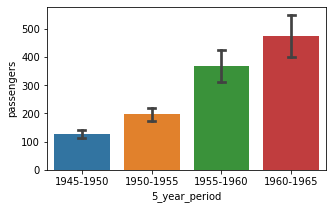

In [54]:
#write your code here: 

_=sns.barplot(
    x = '5_year_period', 
    y='passengers', 
    data=df_median,
    ci="sd",
    capsize=0.1)

##### Box Plots

```python
sns.boxplot(y='passengers', x='month', data=df)
```

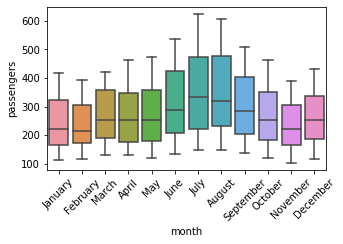

In [55]:
#write your code here: 

p = sns.boxplot(
    y='passengers', 
    x='month', 
    data=df)

_ = p.set_xticklabels(p.get_xticklabels(), rotation=45)

##### Boxen Plots (Box plots for large datasets)

```python
sns.boxenplot(y='passengers', x='month', data=df)
```

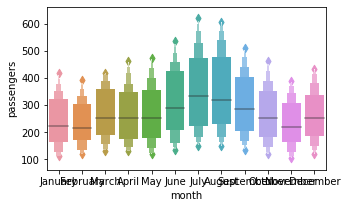

In [48]:
#write your code here: 

sns.boxenplot(y='passengers', x='month', data=df)

##### Heatmap

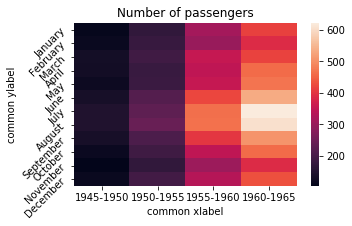

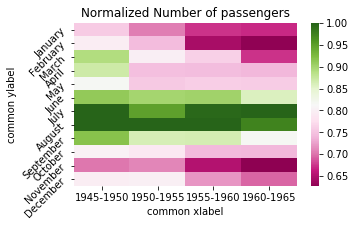

In [59]:
#write your code here: 

g = sns.heatmap(df_wide.drop(['month'],axis=1))
#add the argument cmap to change the palette (ex cmap = "PiYG")


_ = g.set_yticklabels(df_wide['month'])
_ = g.set_yticklabels(g.get_yticklabels(), rotation=45)
_ = g.set(xlabel='common xlabel', ylabel='common ylabel', title= 'Number of passengers')
plt.show()


df_wide_norm = df_wide.drop(['month'],axis=1).apply(lambda x: x/x.max(), axis=0)
g = sns.heatmap(df_wide_norm, cmap = "PiYG")
_ = g.set_yticklabels(df_wide['month'])
_ = g.set_yticklabels(g.get_yticklabels(), rotation=45)
_ = g.set(xlabel='common xlabel', ylabel='common ylabel', title= 'Normalized Number of passengers')
plt.show()

##### SwarmPlot

This is a categorical scatter plot, but the points are adjusted so that they do not overlap
```python
sns.swarmplot(y='passengers', x='month', data=df)
```

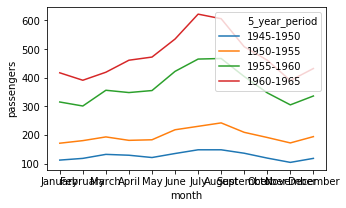

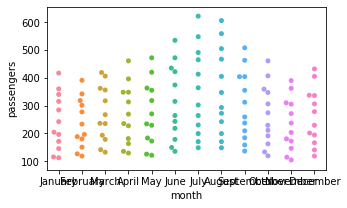

In [61]:
#write your code here: 

sns.lineplot(
    y='passengers', 
    x='month', 
    hue='5_year_period',
    data=df_median)
plt.show()

sns.swarmplot(y='passengers', x='month', data=df)
plt.show()


##### Color Pallets

Color is important when you are creating plots. Often the default colors are not the best choice.

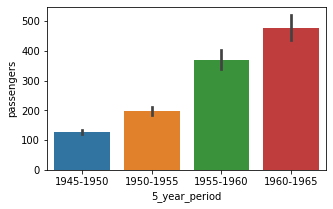

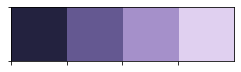

In [62]:
#write your code here: 

sns.barplot(x = '5_year_period', y='passengers', data=df_median)
ncol = len(df_median['5_year_period'].unique())

sns.palplot(
    sns.cubehelix_palette(
        n_colors=ncol, 
        start=-0.05, 
        rot=0.1, 
        reverse=True)
)


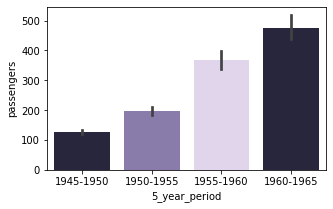

In [52]:
#write your code here: 

c_pal = sns.cubehelix_palette(
    n_colors=3, start=-0.05, rot=0.1, reverse=True
)
_ = sns.barplot(
    x = '5_year_period', y='passengers', data=df_median, palette=c_pal
)

#### Style control

Changing the size of a figure by setting it before we create the plot

This requires matplotlib to be imported

```python
import matplotlib.pyplot as plt
```

In [63]:
import matplotlib.pyplot as plt

The size is set by creatign a new figure. The figure function has an arguement `figsize` which can be set using a tuple `(width, height)`

```python
fig = plt.figure(figsize=(10, 8))

c_pal = sns.cubehelix_palette(n_colors=4, start=-0.05, rot=0.1, reverse=True)
_ = sns.barplot(x = '5_year_period', y='passengers', data=df_median, palette=c_pal)
```

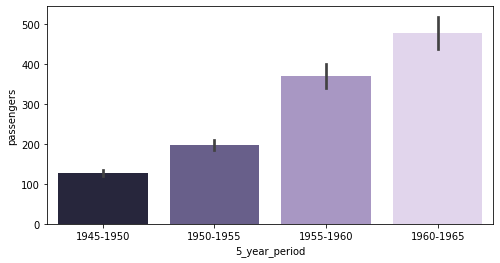

In [65]:
#write your code here: 

fig = plt.figure(figsize=(8, 4))

c_pal = sns.cubehelix_palette(n_colors=4, start=-0.05, rot=0.1, reverse=True)
_ = sns.barplot(x = '5_year_period', y='passengers', data=df_median, palette=c_pal)

This can become painful if we are creating many plots. If Seaborn is being used for plotting the default figure size can be set using this command:

```python
sns.set(rc={'figure.figsize':(11.7,8.27)})
```

**This only needs to be called once, and is usually defined at the top of a notebook**

This also changes the default style of the plots (Notice that the plot now has a gray background and grid lines)


Now all plots we create will be that size:

```python
c_pal = sns.cubehelix_palette(n_colors=4, start=-0.05, rot=0.1, reverse=True)
_ = sns.barplot(x = '5_year_period', y='passengers', data=df_median, palette=c_pal)
```

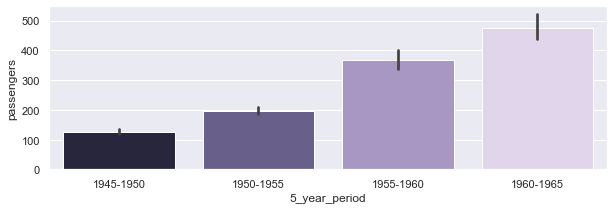

In [66]:
#write your code here: 

sns.set(rc={'figure.figsize':(11.7,8.27)})

fig = plt.figure(figsize=(10, 3))

c_pal = sns.cubehelix_palette(n_colors=4, start=-0.05, rot=0.1, reverse=True)
_ = sns.barplot(x = '5_year_period', y='passengers', data=df_median, palette=c_pal)

#### Rotating the ticks of a plot

The ticks in a plot can be rotated using matplotlibs `plt.xticks()`

```python
c_pal = sns.cubehelix_palette(n_colors=4, start=-0.05, rot=0.1, reverse=True)
_ = sns.barplot(x = '5_year_period', y='passengers', data=df_median, palette=c_pal)
_ = plt.xticks(rotation=45)
```

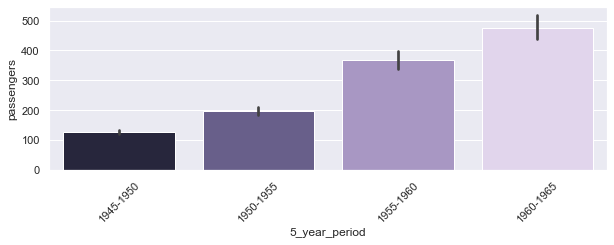

In [67]:
#write your code here:
fig = plt.figure(figsize=(10, 3))

c_pal = sns.cubehelix_palette(n_colors=4, start=-0.05, rot=0.1, reverse=True)
_ = sns.barplot(x = '5_year_period', y='passengers', data=df_median, palette=c_pal)
_ = plt.xticks(rotation=45)

#### Seaborn Default Styles

Seaborn has five default styles:
+ darkgrid
+ whitegrid
+ dark 
+ white 
+ ticks

These can be set using the `sns.set_style()` function. This only needs to be set once if the same style is being used.

```python
sns.set_style('whitegrid')

c_pal = sns.cubehelix_palette(n_colors=4, start=-0.05, rot=0.1, reverse=True)
_ = sns.barplot(x = '5_year_period', y='passengers', data=df_median, palette=c_pal)
_ = plt.xticks(rotation=45)
```

It is also possible to manually adjust all of the aesthetics:
https://seaborn.pydata.org/tutorial/aesthetics.html

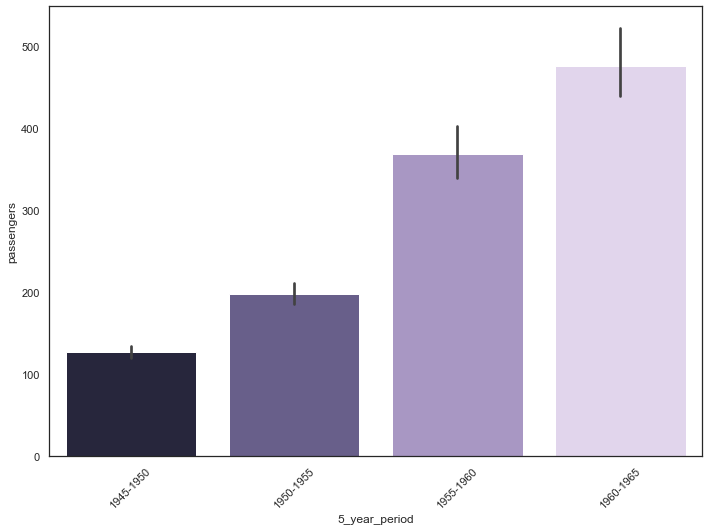

In [68]:
#write your code here:

sns.set_style('white')

c_pal = sns.cubehelix_palette(n_colors=4, start=-0.05, rot=0.1, reverse=True)
_ = sns.barplot(x = '5_year_period', y='passengers', data=df_median, palette=c_pal)
_ = plt.xticks(rotation=45)

#### Setting plot titles

Seaborn does not include functionality for changing plot and axis titles. This is achieved by using matplotlib functionality

```python
c_pal = sns.cubehelix_palette(n_colors=4, start=-0.05, rot=0.1, reverse=True)
g = sns.barplot(x = '5_year_period', y='passengers', data=df_median, palette=c_pal)
_ = plt.xticks(rotation=45)

g.set_title('Passengers per 5 Year Periods')
g.set_xlabel('5 Year Period')
```

Text(0.5, 0, '5 Year Period')

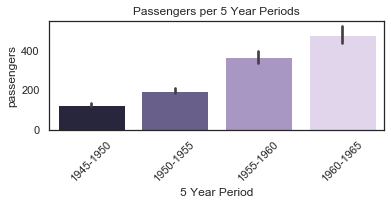

In [70]:
#write your code here:

fig= plt.figure(figsize=[6,2])

c_pal = sns.cubehelix_palette(n_colors=4, start=-0.05, rot=0.1, reverse=True)
g = sns.barplot(x = '5_year_period', y='passengers', data=df_median, palette=c_pal)
_ = plt.xticks(rotation=45)

g.set_title('Passengers per 5 Year Periods')
g.set_xlabel('5 Year Period')

### drawing relational plots to process signal 

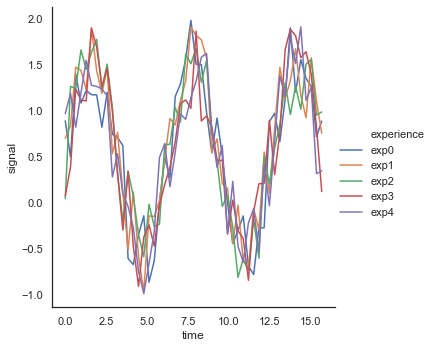

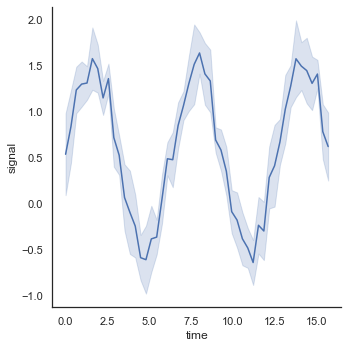

In [71]:
alldata = []
nb_points=50
for experience_nb in range(5):
    x = np.linspace(0,5*np.pi,nb_points)
    y = np.sin(x) + np.random.random(nb_points) * 1
    data_tuples = list(zip(x,y,['exp%d'%experience_nb]*nb_points))
    df = pd.DataFrame(data_tuples, columns=['time','signal','experience'])
    alldata.append(df)

df=pd.concat(alldata).reset_index(drop=True) #drop=True is used to avoid the creation of a new column with old index

alldata

_ = sns.relplot(x="time", y="signal", estimator=None, kind="line", data= df, hue = 'experience')

_ = sns.relplot(x="time", y="signal", kind="line", ci="sd", data=df)


### jointplot for 2D densities
example Sidewalk Cafe in NYC (data from https://opendata.cityofnewyork.us/)

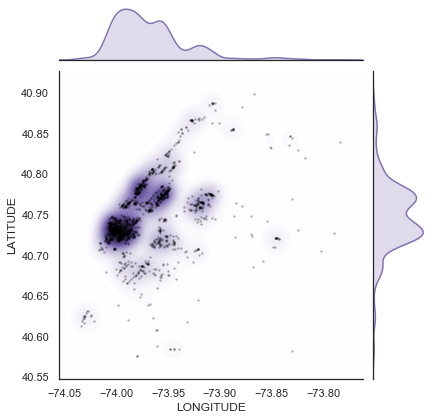

In [73]:
#plt.figure(figsize=[5,5])

df=pd.read_csv('Sidewalk_Caf_NYC.csv')

df = df.loc[df['LONGITUDE'] > -74.5]

g = sns.jointplot(x="LONGITUDE", y="LATITUDE", data=df, kind="kde", color="m", n_levels=100)

_ = g.plot_joint(plt.scatter, c="black", s=10, linewidth=1, marker=".",alpha=0.2)

plt.savefig('HelloNYC.pdf', transparent=True)

In [76]:
#Hand drawn style
plt.xkcd(scale=1, length=100, randomness=2)